In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/kaggle/input/mcdonalds-financial-statements-2002-2022/McDonalds_financial_statements.csv')

In [3]:
df.head()

,Year,Market cap ($B),Revenue ($B),Earnings ($B),P/E ratio,P/S ratio,P/B ratio,Operating Margin (%),EPS ($),Shares Outstanding ($B),Cash on Hand ($B),Dividend Yield (%),Dividend (stock split adjusted) ($),Net assets ($B),Total assets ($B),Total debt ($B),Total liabilities ($B)
0,2022,193.01,23.18,7.82,31.3,8.33,-32.2,33.76,8.42,0.73,2.58,2.15,5.66,-6.01,50.43,48.03,56.43
1,2021,200.31,23.22,9.12,26.5,8.63,-43.5,39.31,10.11,0.74,4.70,1.96,5.25,-4.61,53.60,48.64,58.20
2,2020,159.88,19.20,6.14,33.8,8.32,-20.4,31.97,6.35,0.74,3.44,2.35,5.04,-7.83,52.62,48.51,60.45
3,2019,147.47,21.28,8.01,24.8,6.93,-18.0,38.04,7.98,0.74,0.89,2.39,4.73,-8.22,47.51,46.87,55.72
4,2018,136.21,21.02,7.81,23.2,6.48,-21.8,37.17,7.65,0.76,0.86,2.36,4.19,-6.26,32.81,31.07,39.06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 21 non-null     int64  
 1   Market cap ($B)                      21 non-null     float64
 2   Revenue ($B)                         21 non-null     float64
 3   Earnings ($B)                        21 non-null     float64
 4   P/E ratio                            21 non-null     float64
 5   P/S ratio                            21 non-null     float64
 6   P/B ratio                            21 non-null     float64
 7   Operating Margin (%)                 21 non-null     float64
 8   EPS ($)                              21 non-null     float64
 9   Shares Outstanding ($B)              21 non-null     float64
 10  Cash on Hand ($B)                    21 non-null     float64
 11  Dividend Yield (%)                

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,21.0,2012.000000,6.204837,2002.00,2007.00,2012.00,2017.00,2022.00
Market cap ($B),21.0,96.824286,50.396346,20.39,67.22,90.22,136.21,200.31
Revenue ($B),21.0,22.706190,3.398316,15.40,20.81,22.82,24.62,28.10
Earnings ($B),21.0,6.214762,2.226166,1.66,3.88,6.86,8.01,9.12
P/E ratio,21.0,21.661905,5.541974,15.00,16.50,21.40,24.80,33.80
P/S ratio,21.0,4.234762,2.266896,1.32,2.95,3.36,6.01,8.63
P/B ratio,21.0,-7.100000,19.356029,-45.90,-20.40,2.87,5.53,15.10
Operating Margin (%),21.0,26.889048,8.355580,10.79,19.30,28.52,31.97,39.31
EPS ($),21.0,4.852857,2.507501,0.70,2.88,4.88,6.35,10.11
Shares Outstanding ($B),21.0,0.994762,0.200714,0.73,0.79,1.00,1.18,1.27


In [6]:
df.isnull().sum()

Year                                   0
Market cap ($B)                        0
Revenue ($B)                           0
Earnings ($B)                          0
P/E ratio                              0
P/S ratio                              0
P/B ratio                              0
Operating Margin (%)                   0
EPS ($)                                0
Shares Outstanding ($B)                0
Cash on Hand ($B)                      0
Dividend Yield (%)                     0
Dividend (stock split adjusted) ($)    0
Net assets ($B)                        0
Total assets ($B)                      0
Total debt ($B)                        0
Total liabilities ($B)                 0
dtype: int64

In [7]:
indicators = ['Revenue ($B)', 
              'Earnings ($B)', 
              'P/E ratio',
              'P/S ratio', 
              'P/B ratio', 
              'Operating Margin (%)', 
              'EPS ($)',
              'Total debt ($B)', 
              'Total liabilities ($B)']

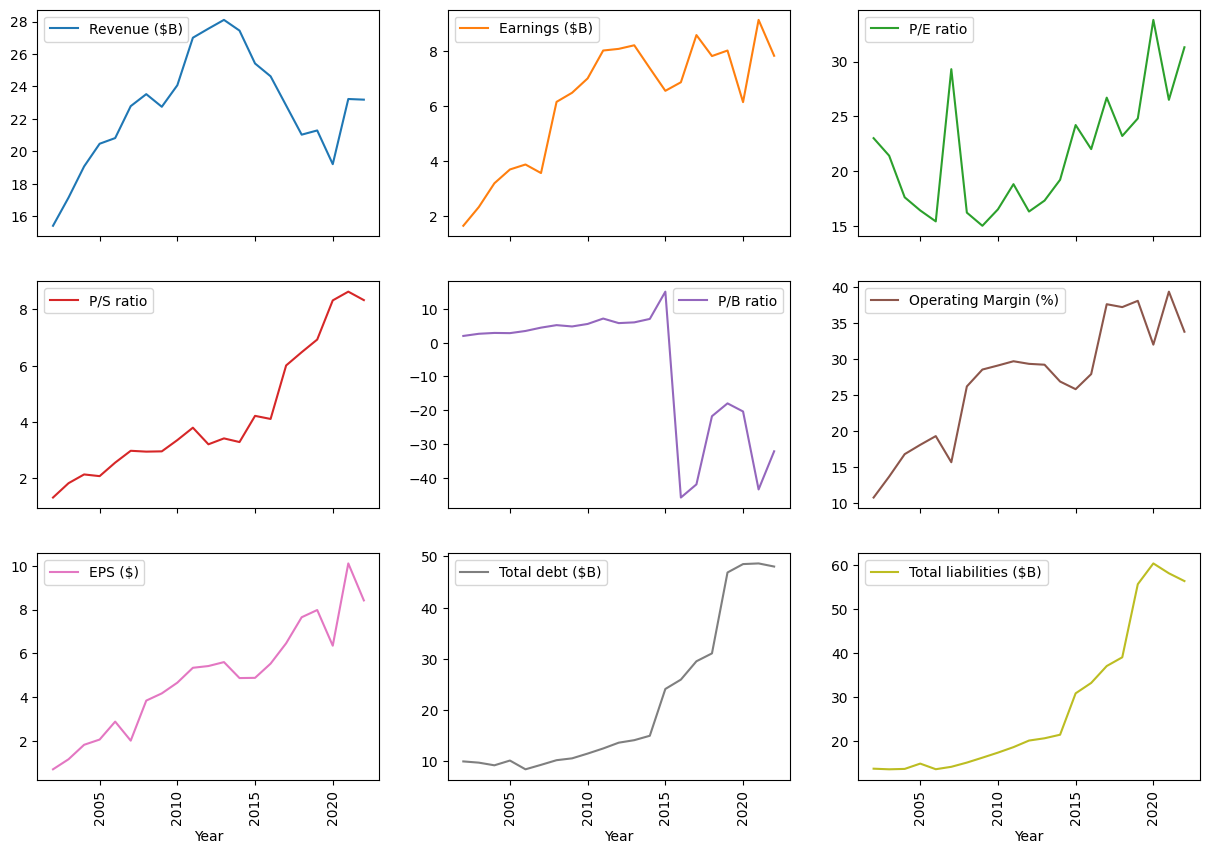

In [8]:
df.plot(x='Year', 
        y=indicators, 
        subplots=True,
       layout=(3,3),
       figsize=(15,10),
       sharex=True,
       rot=90);

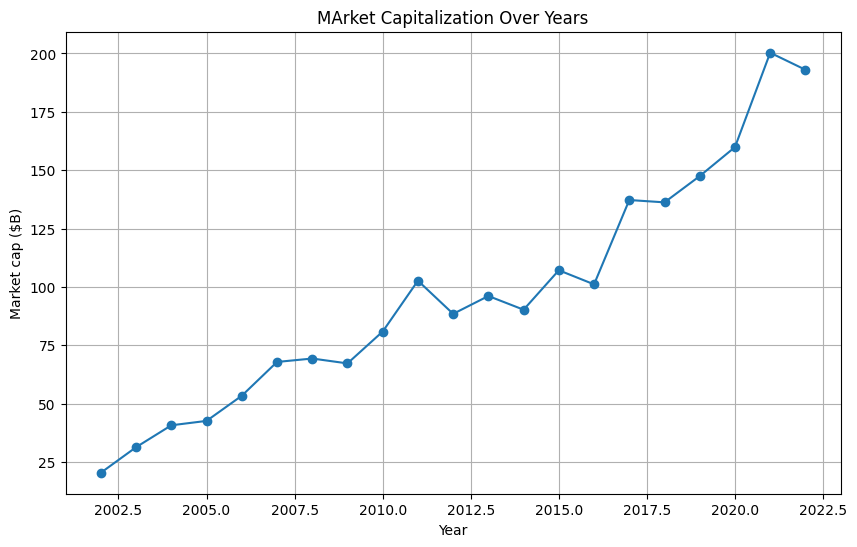

In [9]:
plt.figure(figsize=(10,6))
plt.plot(df['Year'], df['Market cap ($B)'],
       marker= 'o',
       linestyle='-')
plt.xlabel('Year')
plt.ylabel('Market cap ($B)')
plt.title('MArket Capitalization Over Years')
plt.grid(True)

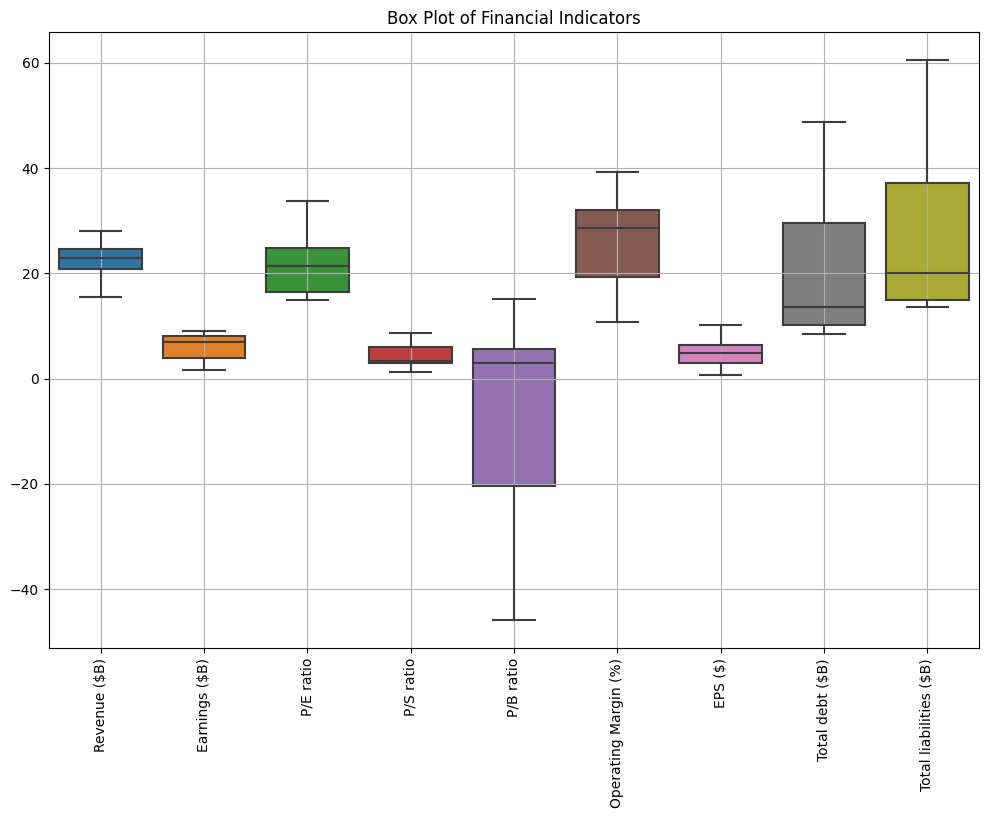

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[indicators])
plt.title('Box Plot of Financial Indicators')
plt.xticks(rotation=90)
plt.grid(True)

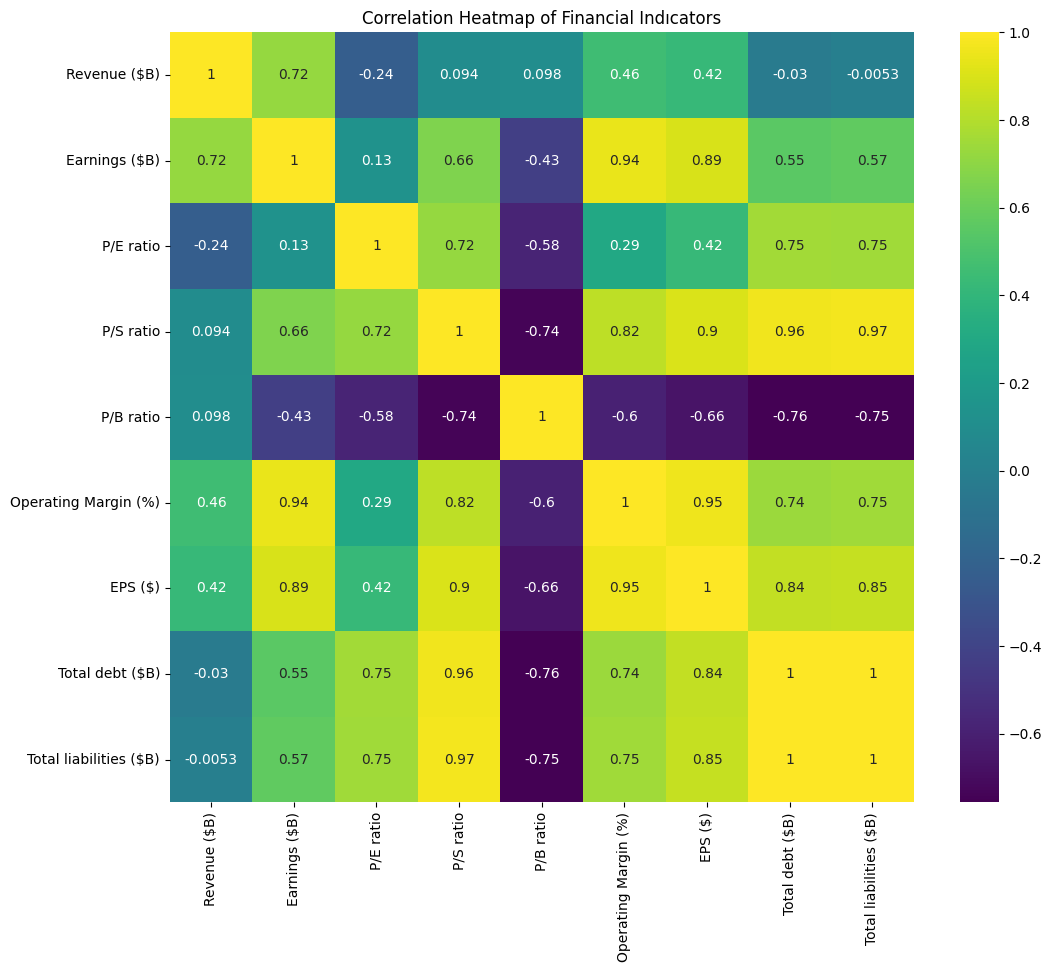

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df[indicators].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Financial Indıcators');

Correlations close to 1 mean that they are almost identical, in which case we will remove these variables.

In [12]:
new_indicators = ['Revenue ($B)',
                  'Earnings ($B)',
                  'P/E ratio',
                  'P/S ratio',
                  'P/B ratio', 
                  'Operating Margin (%)', 
                  'EPS ($)', 
                  'Total liabilities ($B)']

Text(0.5, 1.0, 'Scatterplot With Outliers')

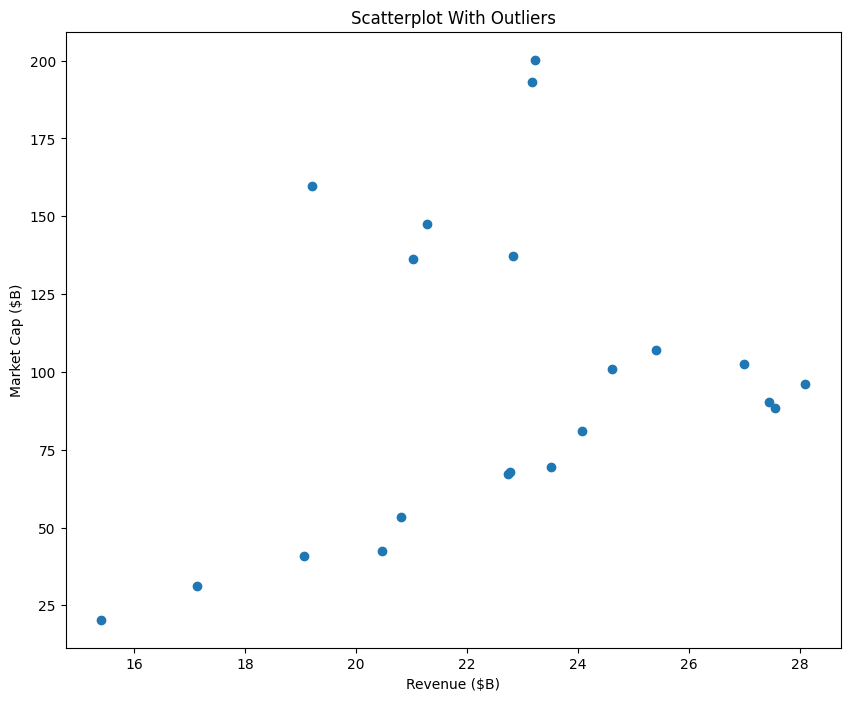

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(df['Revenue ($B)'], df['Market cap ($B)'])
plt.xlabel('Revenue ($B)')
plt.ylabel('Market Cap ($B)')
plt.title('Scatterplot With Outliers')

### Modeling

In [14]:
X = df[['Revenue ($B)',
      'Earnings ($B)',
      'P/E ratio',
      'P/S ratio',
      'P/B ratio', 
      'Operating Margin (%)', 
      'EPS ($)', 
      'Total liabilities ($B)']]

In [15]:
y = df['Market cap ($B)']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.score(X_test, y_test)

0.9616139339655061

In [21]:
y_pred = model.predict(X_test)

In [22]:
mean_absolute_error(y_test, y_pred)

10.557443514337086